In [2]:
# Importing standard Qiskit libraries and configuring account
import qiskit as qk
from qiskit.visualization import plot_histogram
from math import pi

In [3]:
qk.__version__

'1.4.3'

In [5]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister

# Initialize the quantum circuit for the image 
# Pixel position
idx = QuantumRegister(2, 'idx')
# grayscale pixel intensity value
intensity = QuantumRegister(8,'intensity')
# classical register
cr = ClassicalRegister(10, 'cr')

# create the quantum circuit for the image
qc_image = qk.QuantumCircuit(intensity, idx, cr)

# set the total number of qubits
num_qubits = qc_image.num_qubits

qc_image.draw()

intensity_0: 
             
intensity_1: 
             
intensity_2: 
             
intensity_3: 
             
intensity_4: 
             
intensity_5: 
             
intensity_6: 
             
intensity_7: 
             
      idx_0: 
             
      idx_1: 
             
      cr: 10/

In [9]:
# Initialize the quantum circuit

# Optional: Add Identity gates to the intensity values
for idx in range(intensity.size):
    qc_image.id(idx)

# Add Hadamard gates to the pixel positions    
qc_image.h(8)
qc_image.h(9)

# Separate with barrier so it is easy to read later.
qc_image.barrier()
qc_image.draw()

┌───┐ ░ 
intensity_0: ┤ I ├─░─
             ├───┤ ░ 
intensity_1: ┤ I ├─░─
             ├───┤ ░ 
intensity_2: ┤ I ├─░─
             ├───┤ ░ 
intensity_3: ┤ I ├─░─
             ├───┤ ░ 
intensity_4: ┤ I ├─░─
             ├───┤ ░ 
intensity_5: ┤ I ├─░─
             ├───┤ ░ 
intensity_6: ┤ I ├─░─
             ├───┤ ░ 
intensity_7: ┤ I ├─░─
             ├───┤ ░ 
      idx_0: ┤ H ├─░─
             ├───┤ ░ 
      idx_1: ┤ H ├─░─
             └───┘ ░ 
      cr: 10/════════

In [10]:
dir(qc_image)

['__and__',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iand__',
 '__init__',
 '__init_subclass__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '__xor__',
 '_add_qreg',
 '_ancillas',
 '_append',
 '_append_standard_gate',
 '_base_name',
 '_builder_api',
 '_calibrations',
 '_calibrations_prop',
 '_cast',
 '_cbit_argument_conversion',
 '_check_dups',
 '_clbit_indices',
 '_cls_instances',
 '_cls_prefix',
 '_control_flow_scopes',
 '_create_creg',
 '_create_qreg',
 '_current_scope',
 '_data',
 '_duration',
 '_from_circuit_data',
 '_has_calibration_for',
 '_increment_instances',
 '_layout',
 '_metadata',
 '_n

In [12]:
# Encode the first pixel, since its value is 0, we will apply ID gates here:
for idx in range(num_qubits):
    qc_image.id(idx)

qc_image.barrier()
qc_image.draw()

┌───┐ ░ ┌───┐ ░ 
intensity_0: ┤ I ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
intensity_1: ┤ I ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
intensity_2: ┤ I ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
intensity_3: ┤ I ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
intensity_4: ┤ I ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
intensity_5: ┤ I ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
intensity_6: ┤ I ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
intensity_7: ┤ I ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
      idx_0: ┤ H ├─░─┤ I ├─░─
             ├───┤ ░ ├───┤ ░ 
      idx_1: ┤ H ├─░─┤ I ├─░─
             └───┘ ░ └───┘ ░ 
      cr: 10/════════════════

In [13]:
# Encode the second pixel whose value is (01100100):
value01 = '01100100'

# Add the NOT gate to set the position at 01:
qc_image.x(qc_image.num_qubits-1)

# We'll reverse order the value so it is in the same order when measured.
for idx, px_value in enumerate(value01[::-1]):
    if(px_value=='1'):
        qc_image.ccx(num_qubits-1, num_qubits-2, idx)

# Reset the NOT gate
qc_image.x(num_qubits-1)

qc_image.barrier()
qc_image.draw()

┌───┐ ░ ┌───┐ ░                           ░ 
intensity_0: ┤ I ├─░─┤ I ├─░───────────────────────────░─
             ├───┤ ░ ├───┤ ░                           ░ 
intensity_1: ┤ I ├─░─┤ I ├─░───────────────────────────░─
             ├───┤ ░ ├───┤ ░      ┌───┐                ░ 
intensity_2: ┤ I ├─░─┤ I ├─░──────┤ X ├────────────────░─
             ├───┤ ░ ├───┤ ░      └─┬─┘                ░ 
intensity_3: ┤ I ├─░─┤ I ├─░────────┼──────────────────░─
             ├───┤ ░ ├───┤ ░        │                  ░ 
intensity_4: ┤ I ├─░─┤ I ├─░────────┼──────────────────░─
             ├───┤ ░ ├───┤ ░        │  ┌───┐           ░ 
intensity_5: ┤ I ├─░─┤ I ├─░────────┼──┤ X ├───────────░─
             ├───┤ ░ ├───┤ ░        │  └─┬─┘┌───┐      ░ 
intensity_6: ┤ I ├─░─┤ I ├─░────────┼────┼──┤ X ├──────░─
             ├───┤ ░ ├───┤ ░        │    │  └─┬─┘      ░ 
intensity_7: ┤ I ├─░─┤ I ├─░────────┼────┼────┼────────░─
             ├───┤ ░ ├───┤ ░        │    │    │        ░ 
      idx_0: ┤ H ├─░─┤ I ├─░────────■────■────■────────░─
             ├───┤ ░ ├───┤ ░ ┌───┐  │    │    │  ┌───┐ ░ 
      idx_1: ┤ H ├─░─┤ I ├─░─┤ X ├──■────■────■──┤ X ├─░─
             └───┘ ░ └───┘ ░ └───┘               └───┘ ░ 
      cr: 10/════════════════════════════════════════════

In [14]:
# Encode the third pixel whose value is (11001000):
value10 = '11001000'

# Add the 0CNOT gates, where 0 is on X pixel:
qc_image.x(num_qubits-2)
for idx, px_value in enumerate(value10[::-1]):
    if(px_value=='1'):
        qc_image.ccx(num_qubits-1, num_qubits-2, idx)
qc_image.x(num_qubits-2)


qc_image.barrier()
qc_image.draw()

┌───┐ ░ ┌───┐ ░                           ░                     »
intensity_0: ┤ I ├─░─┤ I ├─░───────────────────────────░─────────────────────»
             ├───┤ ░ ├───┤ ░                           ░                     »
intensity_1: ┤ I ├─░─┤ I ├─░───────────────────────────░─────────────────────»
             ├───┤ ░ ├───┤ ░      ┌───┐                ░                     »
intensity_2: ┤ I ├─░─┤ I ├─░──────┤ X ├────────────────░─────────────────────»
             ├───┤ ░ ├───┤ ░      └─┬─┘                ░      ┌───┐          »
intensity_3: ┤ I ├─░─┤ I ├─░────────┼──────────────────░──────┤ X ├──────────»
             ├───┤ ░ ├───┤ ░        │                  ░      └─┬─┘          »
intensity_4: ┤ I ├─░─┤ I ├─░────────┼──────────────────░────────┼────────────»
             ├───┤ ░ ├───┤ ░        │  ┌───┐           ░        │            »
intensity_5: ┤ I ├─░─┤ I ├─░────────┼──┤ X ├───────────░────────┼────────────»
             ├───┤ ░ ├───┤ ░        │  └─┬─┘┌───┐      ░        │  ┌───┐     »
intensity_6: ┤ I ├─░─┤ I ├─░────────┼────┼──┤ X ├──────░────────┼──┤ X ├─────»
             ├───┤ ░ ├───┤ ░        │    │  └─┬─┘      ░        │  └─┬─┘┌───┐»
intensity_7: ┤ I ├─░─┤ I ├─░────────┼────┼────┼────────░────────┼────┼──┤ X ├»
             ├───┤ ░ ├───┤ ░        │    │    │        ░ ┌───┐  │    │  └─┬─┘»
      idx_0: ┤ H ├─░─┤ I ├─░────────■────■────■────────░─┤ X ├──■────■────■──»
             ├───┤ ░ ├───┤ ░ ┌───┐  │    │    │  ┌───┐ ░ └───┘  │    │    │  »
      idx_1: ┤ H ├─░─┤ I ├─░─┤ X ├──■────■────■──┤ X ├─░────────■────■────■──»
             └───┘ ░ └───┘ ░ └───┘               └───┘ ░                     »
      cr: 10/════════════════════════════════════════════════════════════════»
                                                                             »
«                   ░ 
«intensity_0: ──────░─
«                   ░ 
«intensity_1: ──────░─
«                   ░ 
«intensity_2: ──────░─
«                   ░ 
«intensity_3: ──────░─
«                   ░ 
«intensity_4: ──────░─
«                   ░ 
«intensity_5: ──────░─
«                   ░ 
«intensity_6: ──────░─
«                   ░ 
«intensity_7: ──────░─
«             ┌───┐ ░ 
«      idx_0: ┤ X ├─░─
«             └───┘ ░ 
«      idx_1: ──────░─
«                   ░ 
«      cr: 10/════════
«

In [15]:
# Encode the third pixel whose value is (11111111):
value11 = '11111111'

# Add the CCNOT gates:
for idx, px_value in enumerate(value11):
    if(px_value=='1'):
        qc_image.ccx(num_qubits-1,num_qubits-2, idx)

qc_image.barrier()
qc_image.measure(range(10),range(10))
qc_image.draw()

┌───┐ ░ ┌───┐ ░                           ░                     »
intensity_0: ┤ I ├─░─┤ I ├─░───────────────────────────░─────────────────────»
             ├───┤ ░ ├───┤ ░                           ░                     »
intensity_1: ┤ I ├─░─┤ I ├─░───────────────────────────░─────────────────────»
             ├───┤ ░ ├───┤ ░      ┌───┐                ░                     »
intensity_2: ┤ I ├─░─┤ I ├─░──────┤ X ├────────────────░─────────────────────»
             ├───┤ ░ ├───┤ ░      └─┬─┘                ░      ┌───┐          »
intensity_3: ┤ I ├─░─┤ I ├─░────────┼──────────────────░──────┤ X ├──────────»
             ├───┤ ░ ├───┤ ░        │                  ░      └─┬─┘          »
intensity_4: ┤ I ├─░─┤ I ├─░────────┼──────────────────░────────┼────────────»
             ├───┤ ░ ├───┤ ░        │  ┌───┐           ░        │            »
intensity_5: ┤ I ├─░─┤ I ├─░────────┼──┤ X ├───────────░────────┼────────────»
             ├───┤ ░ ├───┤ ░        │  └─┬─┘┌───┐      ░        │  ┌───┐     »
intensity_6: ┤ I ├─░─┤ I ├─░────────┼────┼──┤ X ├──────░────────┼──┤ X ├─────»
             ├───┤ ░ ├───┤ ░        │    │  └─┬─┘      ░        │  └─┬─┘┌───┐»
intensity_7: ┤ I ├─░─┤ I ├─░────────┼────┼────┼────────░────────┼────┼──┤ X ├»
             ├───┤ ░ ├───┤ ░        │    │    │        ░ ┌───┐  │    │  └─┬─┘»
      idx_0: ┤ H ├─░─┤ I ├─░────────■────■────■────────░─┤ X ├──■────■────■──»
             ├───┤ ░ ├───┤ ░ ┌───┐  │    │    │  ┌───┐ ░ └───┘  │    │    │  »
      idx_1: ┤ H ├─░─┤ I ├─░─┤ X ├──■────■────■──┤ X ├─░────────■────■────■──»
             └───┘ ░ └───┘ ░ └───┘               └───┘ ░                     »
      cr: 10/════════════════════════════════════════════════════════════════»
                                                                             »
«                   ░ ┌───┐                                    ░ ┌─┐         »
«intensity_0: ──────░─┤ X ├────────────────────────────────────░─┤M├─────────»
«                   ░ └─┬─┘┌───┐                               ░ └╥┘┌─┐      »
«intensity_1: ──────░───┼──┤ X ├───────────────────────────────░──╫─┤M├──────»
«                   ░   │  └─┬─┘┌───┐                          ░  ║ └╥┘┌─┐   »
«intensity_2: ──────░───┼────┼──┤ X ├──────────────────────────░──╫──╫─┤M├───»
«                   ░   │    │  └─┬─┘┌───┐                     ░  ║  ║ └╥┘┌─┐»
«intensity_3: ──────░───┼────┼────┼──┤ X ├─────────────────────░──╫──╫──╫─┤M├»
«                   ░   │    │    │  └─┬─┘┌───┐                ░  ║  ║  ║ └╥┘»
«intensity_4: ──────░───┼────┼────┼────┼──┤ X ├────────────────░──╫──╫──╫──╫─»
«                   ░   │    │    │    │  └─┬─┘┌───┐           ░  ║  ║  ║  ║ »
«intensity_5: ──────░───┼────┼────┼────┼────┼──┤ X ├───────────░──╫──╫──╫──╫─»
«                   ░   │    │    │    │    │  └─┬─┘┌───┐      ░  ║  ║  ║  ║ »
«intensity_6: ──────░───┼────┼────┼────┼────┼────┼──┤ X ├──────░──╫──╫──╫──╫─»
«                   ░   │    │    │    │    │    │  └─┬─┘┌───┐ ░  ║  ║  ║  ║ »
«intensity_7: ──────░───┼────┼────┼────┼────┼────┼────┼──┤ X ├─░──╫──╫──╫──╫─»
«             ┌───┐ ░   │    │    │    │    │    │    │  └─┬─┘ ░  ║  ║  ║  ║ »
«      idx_0: ┤ X ├─░───■────■────■────■────■────■────■────■───░──╫──╫──╫──╫─»
«             └───┘ ░   │    │    │    │    │    │    │    │   ░  ║  ║  ║  ║ »
«      idx_1: ──────░───■────■────■────■────■────■────■────■───░──╫──╫──╫──╫─»
«                   ░                                          ░  ║  ║  ║  ║ »
«      cr: 10/════════════════════════════════════════════════════╩══╩══╩══╩═»
«                                                                 0  1  2  3 »
«                               
«intensity_0: ──────────────────
«                               
«intensity_1: ──────────────────
«                               
«intensity_2: ──────────────────
«                               
«intensity_3: ──────────────────
«             ┌─┐               
«intensity_4: ┤M├───────────────
«             └╥┘┌─┐            
«intensity_5: ─╫

In [16]:
print('Circuit dimensions')
print('Circuit depth: ', qc_image.decompose().depth())
print('Circuit size: ', qc_image.decompose().size())

qc_image.decompose().count_ops()

Circuit dimensions
Circuit depth:  148
Circuit size:  244


OrderedDict([('cx', 84),
             ('t', 56),
             ('tdg', 42),
             ('h', 28),
             ('id', 18),
             ('measure', 10),
             ('barrier', 5),
             ('u3', 4),
             ('u2', 2)])

In [17]:
from qiskit.providers.basic_provider import BasicProvider
 
backend = BasicProvider().get_backend('basic_simulator')

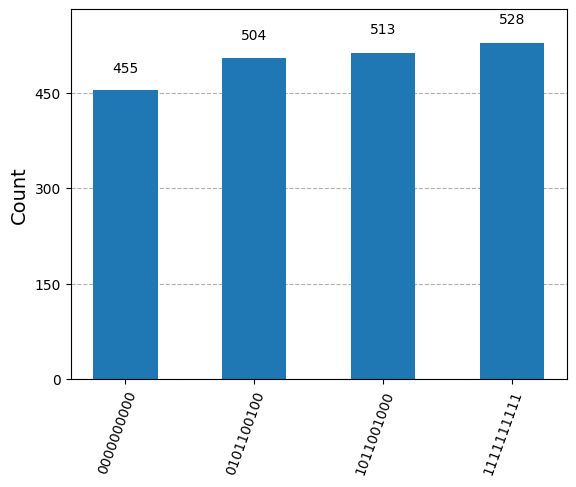

In [18]:
# If you do not specify the number of shots, the default is 1024
result = backend.run(qc_image, shots=2000).result()   

# Extract the counts of 0 and 1 measurements
counts = result.get_counts()                    
plot_histogram(counts)